<a href="https://colab.research.google.com/github/mvu2ab/knn-td/blob/main/assignment_knn_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

In [3]:
! git clone https://github.com/ds4e/knn

Cloning into 'knn'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 66 (delta 19), reused 11 (delta 11), pack-reused 41 (from 2)
Receiving objects: 100% (66/66), 23.08 MiB | 19.20 MiB/s, done.
Resolving deltas: 100% (22/22), done.


**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. The difference between regression and classification is the type of output/variable that is being predicted through the models. A regression model seeks to predict numeric quantities and outputs continuous variables. A classification model seeks to predict categories/labels and outputs discrete class labels.

2. A confusion table (confusion matrix) is a tool used to analyze the accuracy of a classification model through a comparison of predicted labels to true labels. It helps to understand more than just general overall accuracy of a model, like when classes are imbalanced.

3. The SSE (Sum of Squared Errors) quantifies the total amount of error in a specific model's predictions.

4. Overfitting and underfitting are common problems when developing machine learning models. Overfitting occurs when a model learns the training data too well. For example, the model is unable to adapt to hyperspecific patterns that do not generalize to other data points. Underfitting occurs when a model is too simple and can not develop relationships for the training and testing data. For example, there is no pattern recognition.

5. By doing this, the model is able to be improved upon and made more generalizable. It can prevent overfitting. By testing the data you can ensure that the k value is appropriate.

6. Class Label approach is simple, fast, and easy to evaluate. However this approach has no confidence information and is less flexible. A probability distribution approach has rich info, thus making it better for nuanced decisions. However, it is harder to interpret needing calibration.



**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [12]:
import pandas as pd

cars_df = pd.read_csv('/content/knn/data/USA_cars_datasets.csv')

cars_df = cars_df[['price', 'year', 'mileage']]


cars_df.head()


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [13]:
cars_df.shape

(2499, 3)

In [11]:
cars_df.isna().sum()

,0
price,0
year,0
mileage,0


There are no N/A values.

In [14]:
# Min-max normalization
cars_df['year'] = (cars_df['year'] - cars_df['year'].min()) / (cars_df['year'].max() - cars_df['year'].min())
cars_df['mileage'] = (cars_df['mileage'] - cars_df['mileage'].min()) / (cars_df['mileage'].max() - cars_df['mileage'].min())


In [16]:
# ~80% for training and ~20% for evaluation

from sklearn.model_selection import train_test_split

train_df, eval_df = train_test_split(cars_df, test_size=0.2, random_state=42)


In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Features and target
X_train = train_df[['year', 'mileage']]
y_train = train_df['price']
X_test = eval_df[['year', 'mileage']]
y_test = eval_df['price']

# List of k values
k_values = [3, 10, 25, 50, 100, 300]


k = 3, Mean Squared Error = 148065935.52


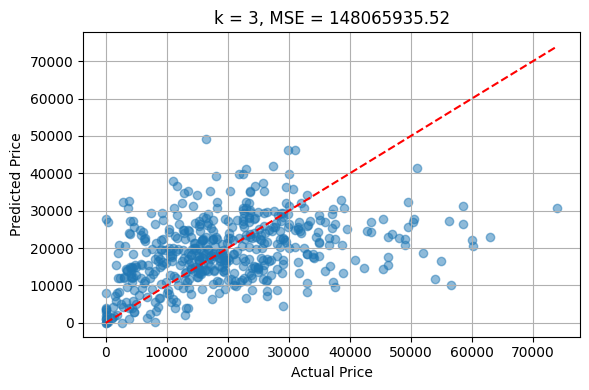

k = 10, Mean Squared Error = 117399126.11


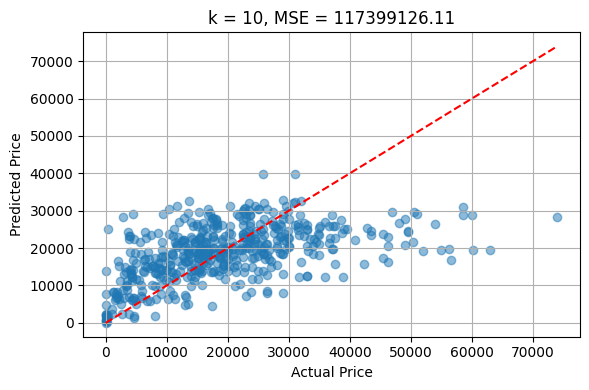

k = 25, Mean Squared Error = 112576160.82


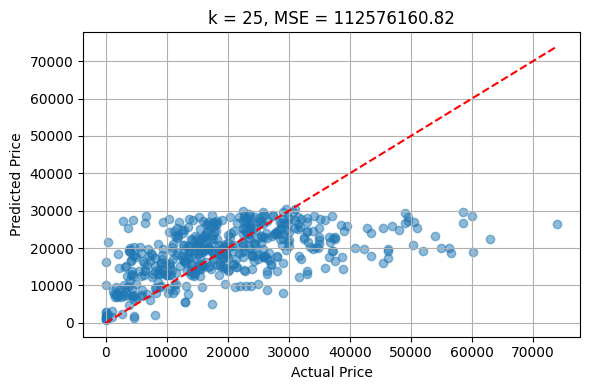

k = 50, Mean Squared Error = 110202549.30


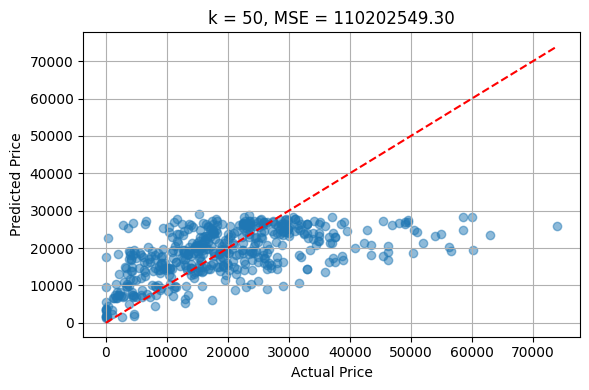

k = 100, Mean Squared Error = 112253932.82


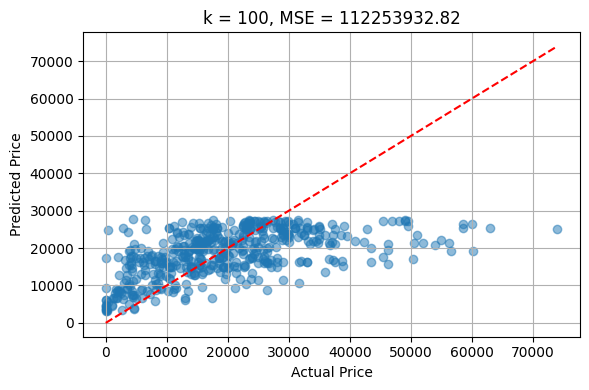

k = 300, Mean Squared Error = 114496301.83


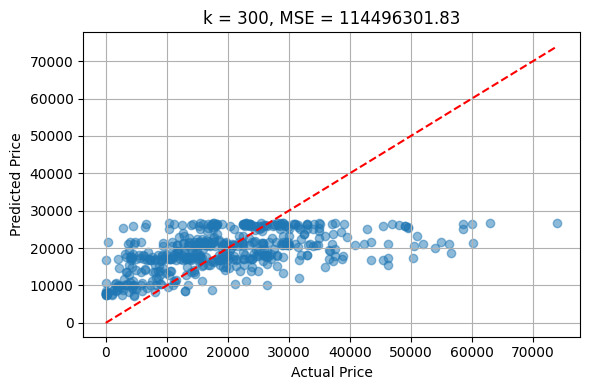

In [18]:
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f'k = {k}, Mean Squared Error = {mse:.2f}')

    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'k = {k}, MSE = {mse:.2f}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


As K increases, predictions get closer to the mean of the training values, leading to lower variance but higher bias.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Range of k values to try
k_range = range(1, 301, 5)
mse_values = []

for k in k_range:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

optimal_k = k_range[np.argmin(mse_values)]
min_mse = min(mse_values)

print(f'Optimal k = {optimal_k} with MSE = {min_mse:.2f}')


Optimal k = 51 with MSE = 109966459.50


Low k tends to lead to Overfitting: Highly variable, overly complex predictions.

High k tends to lead to Underfitting: Oversimplified, averaged predictions.

Optimal k tends to lead to the Best generalization: Found at the lowest MSE, often with well-aligned scatterplots.

